(-0.4444190487631618, 3.5036737336332937)

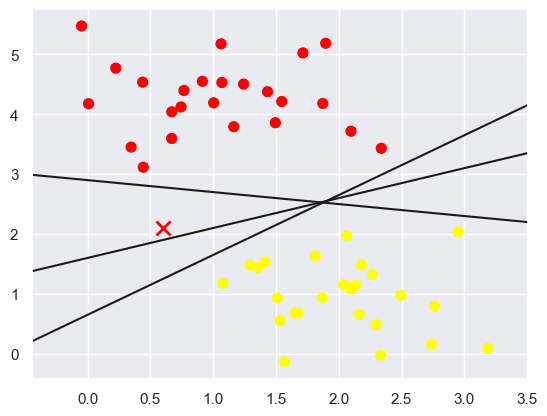

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#matplotlib inline
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(X[:,0].min()*0.8, X[:,0].max()*1.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(xfit[0], xfit[-1])

(-0.4444190487631618, 3.5036737336332937)

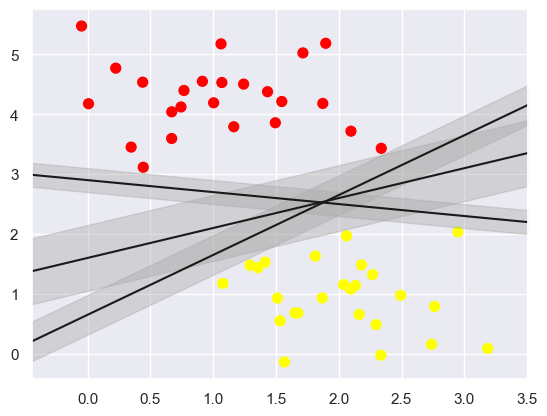

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
    
plt.xlim(xfit[0], xfit[-1])    

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=250, linewidth=1, edgecolors='k', facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [8]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

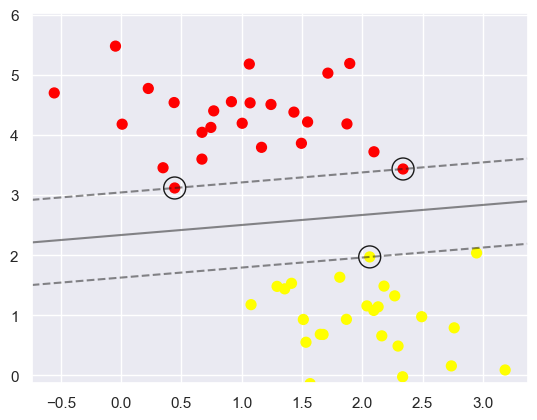

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.ylim(X[:,1].min()*0.9, X[:,1].max()*1.1,)    
plot_svc_decision_function(model);

(-0.12429531131496234, 6.021677821046211)

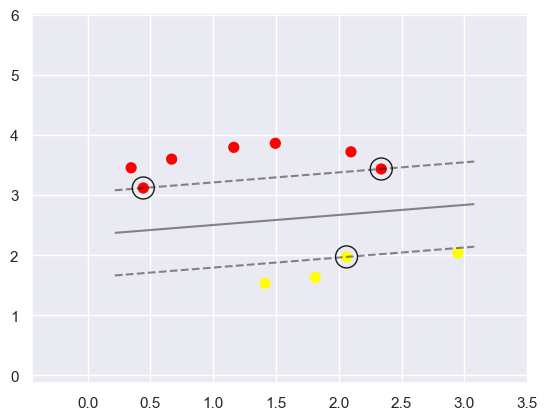

In [9]:
which = np.logical_and(X[:,1]>1.5,X[:,1]<4)
X2 = X[which,:]
y2 = y[which]

model.fit(X2, y2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='autumn')
plot_svc_decision_function(model);

plt.xlim(xfit[0], xfit[-1])    
plt.ylim(X[:,1].min()*0.9, X[:,1].max()*1.1,)    

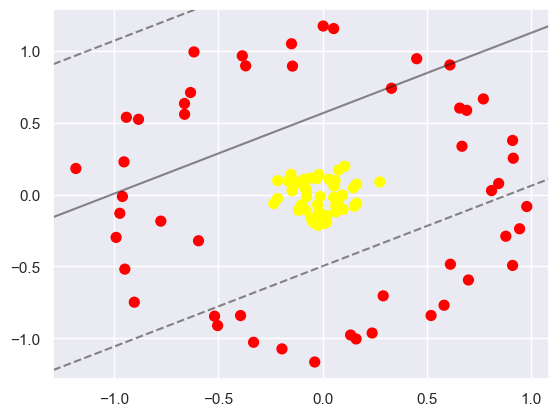

In [10]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

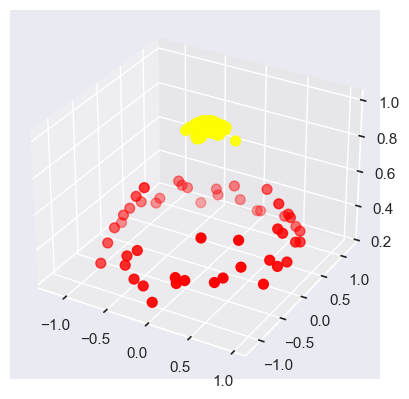

In [11]:
r = np.exp(-(X ** 2).sum(1))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')


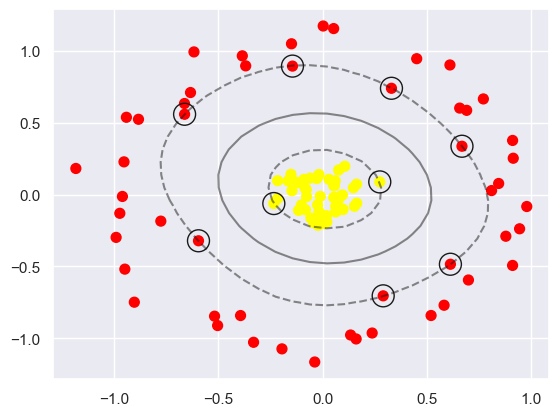

In [12]:
clf = SVC(kernel='rbf', C=1E8)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

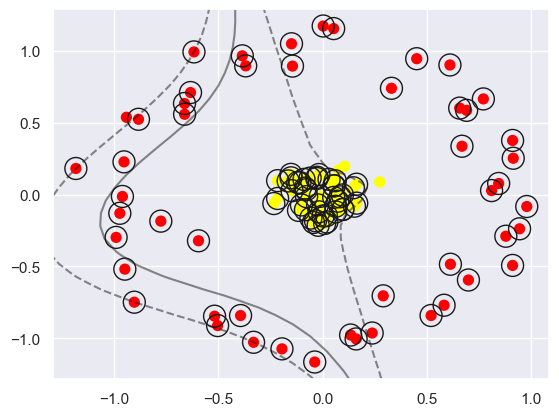

In [13]:
clf = SVC(kernel='poly', C=1E3)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

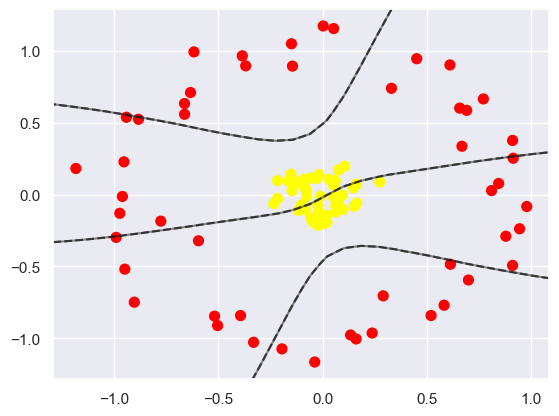

In [14]:
clf = SVC(kernel='sigmoid', C=1E3)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

##Exemple real

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


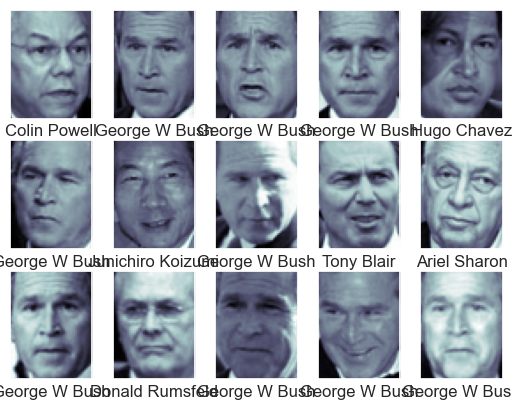

In [15]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [17]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
#model = make_pipeline(pca, svc)
model = make_pipeline(svc)
model.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

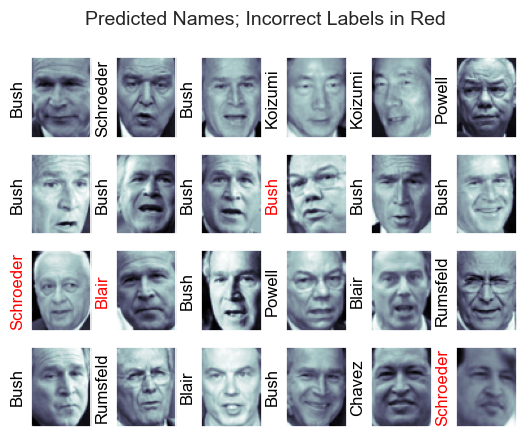

In [18]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.73      0.71        15
     Colin Powell       0.76      0.81      0.79        68
  Donald Rumsfeld       0.74      0.74      0.74        31
    George W Bush       0.87      0.79      0.82       126
Gerhard Schroeder       0.39      0.57      0.46        23
      Hugo Chavez       0.92      0.55      0.69        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.69      0.74      0.71        42

         accuracy                           0.76       337
        macro avg       0.74      0.74      0.73       337
     weighted avg       0.78      0.76      0.76       337



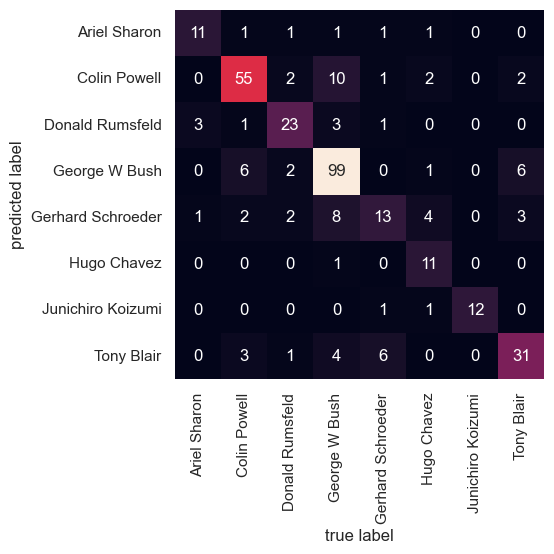

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.67      0.67        15
     Colin Powell       0.84      0.84      0.84        68
  Donald Rumsfeld       0.70      0.68      0.69        31
    George W Bush       0.87      0.84      0.85       126
Gerhard Schroeder       0.69      0.78      0.73        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.79      0.90      0.84        42

         accuracy                           0.82       337
        macro avg       0.79      0.80      0.79       337
     weighted avg       0.82      0.82      0.82       337



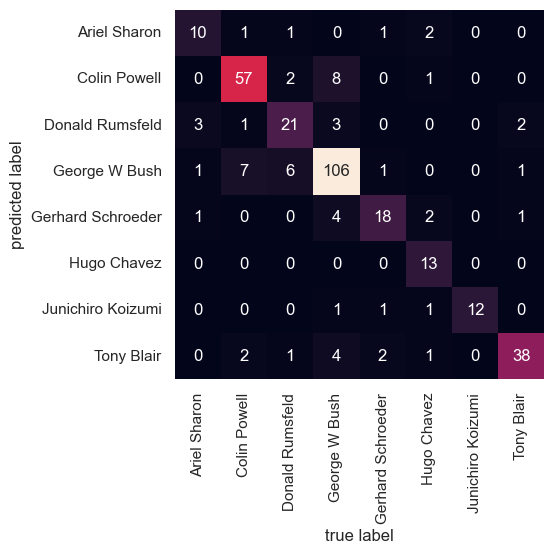

In [20]:
svc = SVC(kernel='linear', class_weight='balanced')
#model = make_pipeline(pca, svc)
model = make_pipeline(svc)
model.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

print(classification_report(ytest, yfit,
                            target_names=faces.target_names))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

[kernel functions]( https://scikit-learn.org/stable/modules/svm.html#kernel-functions)

[behaviour of paramters on rbf](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py)